In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv ('amz_uk_price_prediction_dataset.csv', index_col='uid')
df = df.drop_duplicates()
df = df.dropna(subset=["price", "title", "asin"])
df = df[df["price"] > 0]

df.head()
# Part 1: Analyzing Best-Seller Trends Across Product Categories
bestseller = df[['stars','reviews','isBestSeller','category']]
bestseller['isBestSeller'] = (
    bestseller['isBestSeller'].map({True:'1', False:'0', 'True':1, 'False':0}).astype(int)
)
summary = (
    bestseller.groupby('category')['isBestSeller']
    .agg(
        bestseller_rate='mean',
        n_products = 'count',
        n_bestsellers = 'sum'
    )
    .sort_values('bestseller_rate', ascending=False))
print(summary)
only_best = bestseller[bestseller['isBestSeller']==1]
top_counts = only_best['category'].value_counts()
top_counts.head()


# Objective: Understand the relationship between product categories and their best-seller status.
top10 = summary.sort_values("bestseller_rate", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10.index, top10["bestseller_rate"])
plt.xlabel("Best-seller rate (%)")
plt.ylabel("Category")
plt.title("Top 10 Categories by Best-seller Rate")
plt.show()
# Crosstab Analysis:



Text(0.5, 1.0, 'Best-seller rate (share in %)')

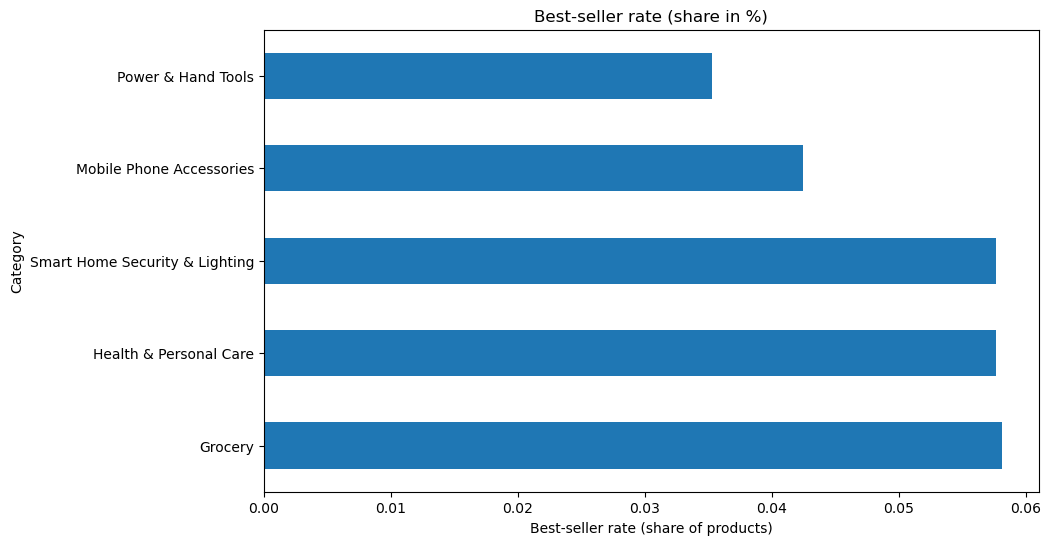

In [ ]:
# Create a crosstab between the product category and the isBestSeller status.
ct_bestseller_rate = pd.crosstab(bestseller['category'], bestseller['isBestSeller'],normalize='index')
ct_bestseller_rate = ct_bestseller_rate.sort_values(1, ascending=False)
ct_bestseller_rate.head(10)

top5 = ct_bestseller_rate.sort_values(1,ascending=False).head(5)
top5[1].plot(kind='barh', figsize=(10,6))
plt.xlabel("Best-seller rate (share of products)")
plt.ylabel ("Category")
plt.title('Best-seller rate (share in %)')
# Are there categories where being a best-seller is more prevalent?

# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

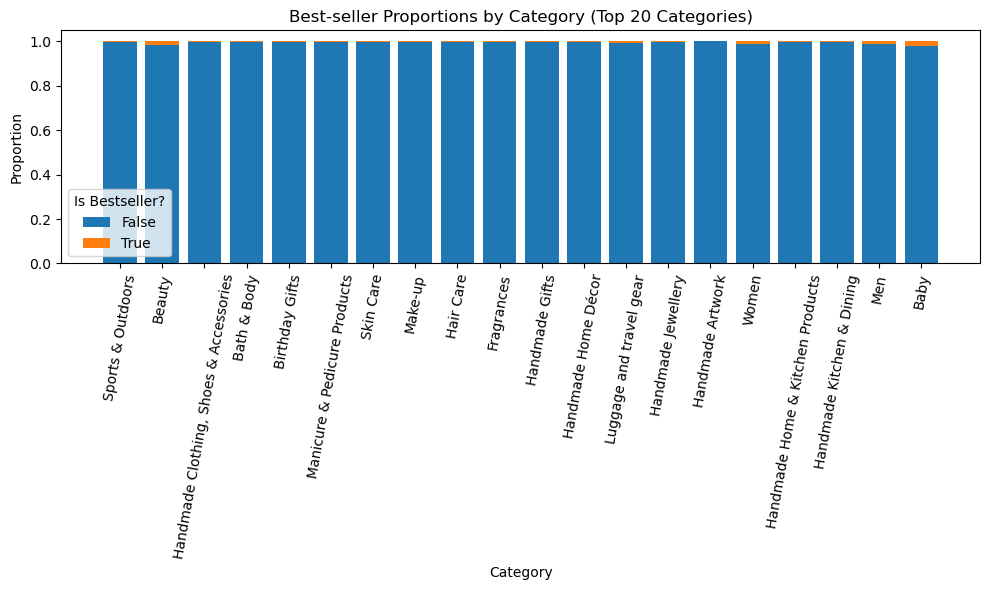

Chi-square statistic: 0.14587059050261275
p-value: 1.0
Degrees of freedom: 19
Expected frequencies:
 [[0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]]


In [ ]:
# Statistical Tests:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from math import sqrt
bestseller = df[['stars','reviews','isBestSeller','category']]
crosstab = pd.crosstab(bestseller['category'], bestseller['isBestSeller'])
crosstab.head()
top20cats = crosstab.sum(axis=1).sort_values(ascending=False).head(20).index
ct_top20 = crosstab.loc[top20cats]
ct_proportions = ct_top20.div(ct_top20.sum(axis=1), axis=0)



# Visualizations:

# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
plt.figure(figsize=(10,6))
bottom = None

for col in ct_proportions.columns:
    vals = ct_proportions[col].values
    plt.bar(ct_proportions.index, vals, bottom=bottom, label=str(col))
    bottom = vals if bottom is None else bottom+vals

plt.title("Best-seller Proportions by Category (Top 20 Categories)")
plt.ylabel("Proportion")
plt.xlabel("Category")
plt.xticks(rotation=80)
plt.legend(title = 'Is Bestseller?')
plt.tight_layout()
plt.show()

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct_proportions)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.

# Preliminary Step: Remove outliers in product prices.

# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

# Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

# Violin Plots:

# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.
# Box Plots:

# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
# Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.

# Correlation Coefficients:

# Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?
# Visualizations:

# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
# Use a correlation heatmap to visualize correlations between all numerical variables.
# Examine if product prices typically follow a normal distribution using a QQ plot.

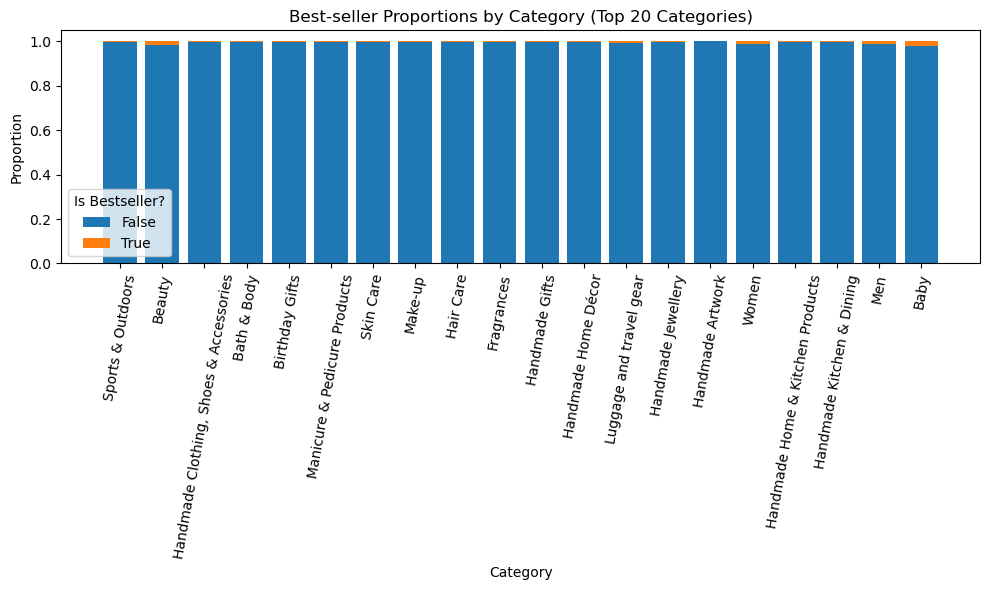

Chi-square statistic: 0.14587059050261275
p-value: 1.0
Degrees of freedom: 19
Expected frequencies:
 [[0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]
 [0.99541502 0.00458498]]


In [ ]:
# Statistical Tests:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from math import sqrt
bestseller = df[['stars','reviews','isBestSeller','category']]
crosstab = pd.crosstab(bestseller['category'], bestseller['isBestSeller'])
crosstab.head()
top20cats = crosstab.sum(axis=1).sort_values(ascending=False).head(20).index
ct_top20 = crosstab.loc[top20cats]
ct_proportions = ct_top20.div(ct_top20.sum(axis=1), axis=0)



# Visualizations:

# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
plt.figure(figsize=(10,6))
bottom = None

for col in ct_proportions.columns:
    vals = ct_proportions[col].values
    plt.bar(ct_proportions.index, vals, bottom=bottom, label=str(col))
    bottom = vals if bottom is None else bottom+vals

plt.title("Best-seller Proportions by Category (Top 20 Categories)")
plt.ylabel("Proportion")
plt.xlabel("Category")
plt.xticks(rotation=80)
plt.legend(title = 'Is Bestseller?')
plt.tight_layout()
plt.show()

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct_proportions)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.

# Preliminary Step: Remove outliers in product prices.

# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

# Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

# Violin Plots:

# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.
# Box Plots:

# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
# Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.

# Correlation Coefficients:

# Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?
# Visualizations:

# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
# Use a correlation heatmap to visualize correlations between all numerical variables.
# Examine if product prices typically follow a normal distribution using a QQ plot.

In [ ]:
import numpy as np

# sample size = total number of observations
n = ct_proportions.values.sum()

# min(#rows, #cols)
k = min(ct_proportions.shape)

# Cramér's V formula
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

print(f"Cramér's V: {cramers_v:.3f}")

df.head()

Cramér's V: 0.085


,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
uid,,,,,,,,
1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


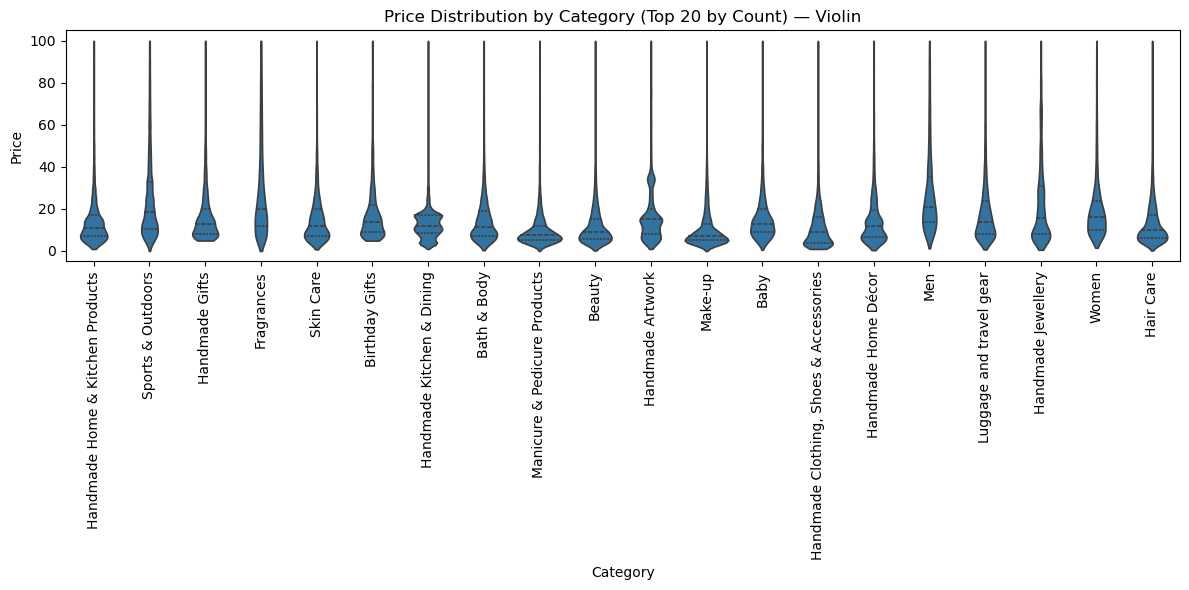

Highest median price category (no filter): Desktop PCs  |  median=74.00


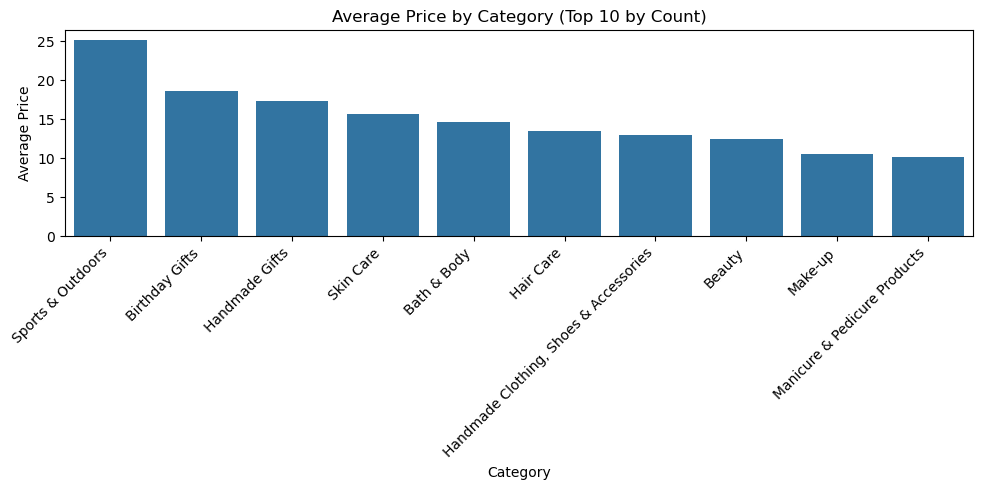

Highest average price category (no filter): Motherboards  |  mean=68.77


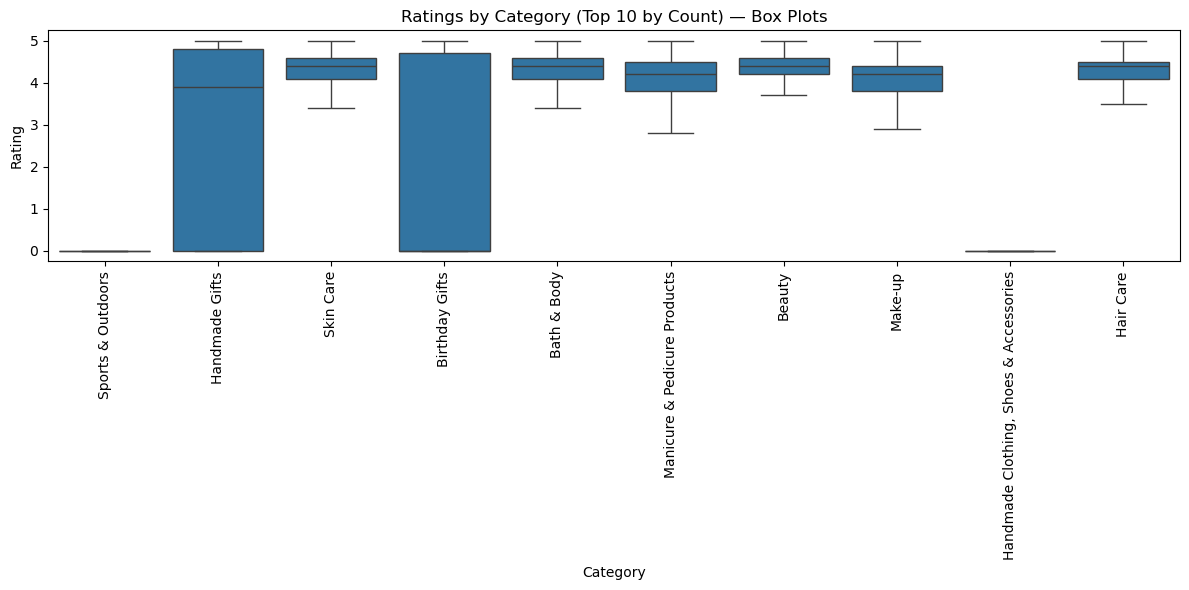

Highest median rating category (no filter): Computer Memory  |  median=4.7
Pearson correlation between price and stars: r=-0.078, p-value=0


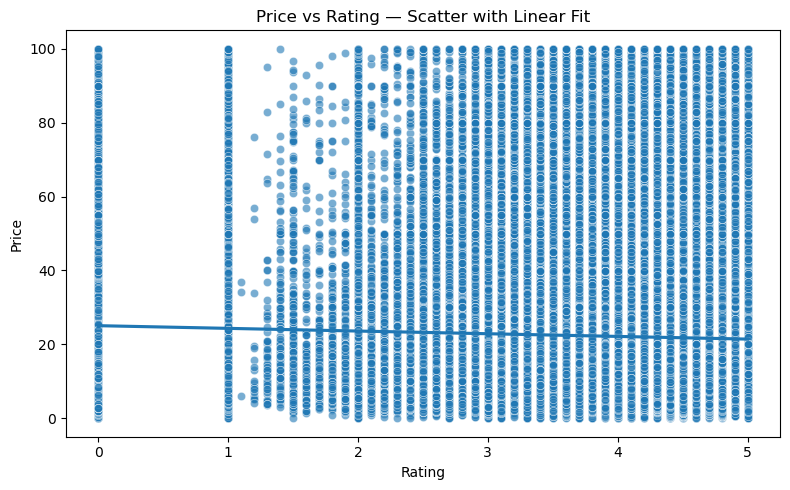

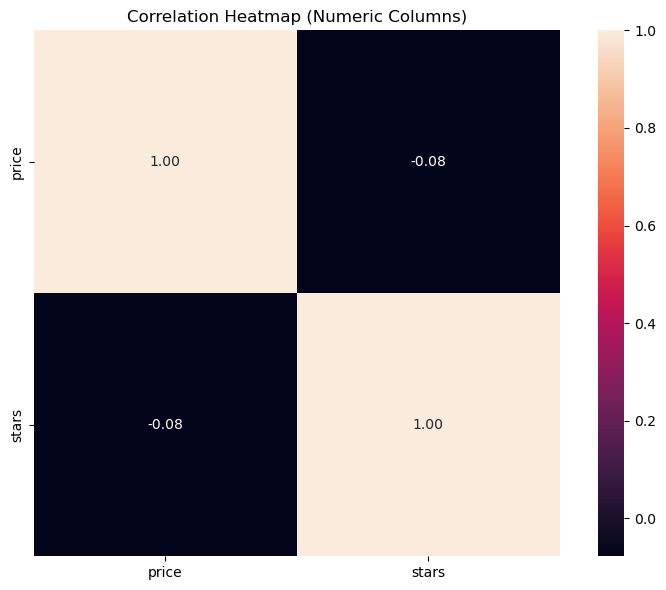

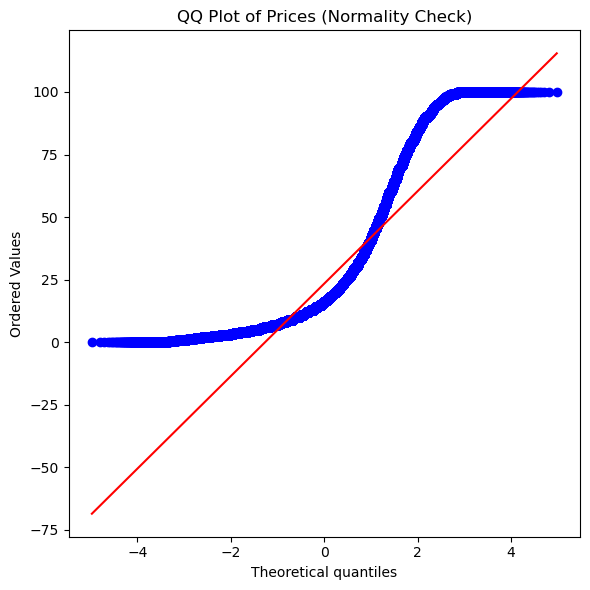


Top 5 categories by count (post-outlier removal):
category
Sports & Outdoors                         694087
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Name: count, dtype: int64

Median price by category (top 5):
category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64

Average price by category (top 5):
category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64

Median rating by category (top 5):
category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Name: stars, dtype: float64


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Try to guess price and rating columns if not set:
possible_price_cols  = ["price", "Price", "unit_price", "sale_price", "amount"]
possible_rating_cols = ["stars", "rating", "ratings", "review_stars", "star_rating"]

category_col = "category"
price_col  = next((c for c in possible_price_cols  if c in df.columns), None)
rating_col = next((c for c in possible_rating_cols if c in df.columns), None)

if price_col is None:
    raise ValueError("Couldn't find a price column. Please set price_col to your price field name.")
if rating_col is None:
    raise ValueError("Couldn't find a rating column. Please set rating_col to your rating field name.")

# Keep only needed columns for this part
work = df[[category_col, price_col, rating_col]].copy()

# Basic cleaning

work[price_col]  = pd.to_numeric(work[price_col], errors="coerce")
work[rating_col] = pd.to_numeric(work[rating_col], errors="coerce")
work = work.dropna(subset=[category_col, price_col, rating_col])

# ===========================================
# Part 2 — Remove outliers in product prices
# ===========================================

Q1 = work[price_col].quantile(0.25)
Q3 = work[price_col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

work_no_out = work[(work[price_col] >= lower) & (work[price_col] <= upper)].copy()



# ===========================================
# Part 2 — Visuals & summaries (Categories)
# ===========================================


def top_categories(df_, n):
    return df_[category_col].value_counts().head(n).index

# ---------- Violin plot: price by category (top 20 for readability) ----------
top20 = top_categories(work_no_out, 20)
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=work_no_out[work_no_out[category_col].isin(top20)],
    x=category_col, y=price_col, inner="quartile", cut=0
)
plt.title("Price Distribution by Category (Top 20 by Count) — Violin")
plt.xlabel("Category"); plt.ylabel("Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ---------- Which category tends to have the highest median price? (no filter) ----------
median_price_by_cat = work_no_out.groupby(category_col)[price_col].median().sort_values(ascending=False)
highest_median_price_cat = median_price_by_cat.index[0]
print(f"Highest median price category (no filter): {highest_median_price_cat}  |  median={median_price_by_cat.iloc[0]:.2f}")

# ---------- Bar chart: average price for top 10 categories by count ----------
top10 = top_categories(work_no_out, 10)
avg_price_by_cat_top10 = work_no_out[work_no_out[category_col].isin(top10)].groupby(category_col)[price_col].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_cat_top10.index, y=avg_price_by_cat_top10.values)
plt.title("Average Price by Category (Top 10 by Count)")
plt.xlabel("Category"); plt.ylabel("Average Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---------- Which category commands the highest average price? (no filter) ----------
mean_price_by_cat = work_no_out.groupby(category_col)[price_col].mean().sort_values(ascending=False)
highest_mean_price_cat = mean_price_by_cat.index[0]
print(f"Highest average price category (no filter): {highest_mean_price_cat}  |  mean={mean_price_by_cat.iloc[0]:.2f}")

# ---------- Box plots: ratings by category (top 10 by count for readability) ----------
top10_for_ratings = top_categories(work_no_out, 10)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=work_no_out[work_no_out[category_col].isin(top10_for_ratings)],
    x=category_col, y=rating_col, showfliers=False
)
plt.title("Ratings by Category (Top 10 by Count) — Box Plots")
plt.xlabel("Category"); plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ---------- Which category has the highest median rating? (no filter) ----------
median_rating_by_cat = work_no_out.groupby(category_col)[rating_col].median().sort_values(ascending=False)
highest_median_rating_cat = median_rating_by_cat.index[0]
print(f"Highest median rating category (no filter): {highest_median_rating_cat}  |  median={median_rating_by_cat.iloc[0]:.3g}")

# =====================================================
# Part 3 — Price vs Rating: correlations & visualizations
# =====================================================

# ---------- Pearson correlation (price vs rating) ----------
# Drop rows with NaNs in the pair just to be safe
pair = work_no_out[[price_col, rating_col]].dropna()
r, pval = stats.pearsonr(pair[price_col], pair[rating_col])
print(f"Pearson correlation between {price_col} and {rating_col}: r={r:.3f}, p-value={pval:.3g}")

# ---------- Scatter plot: rating vs price ----------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=work_no_out, x=rating_col, y=price_col, alpha=0.6)
sns.regplot(data=work_no_out, x=rating_col, y=price_col, scatter=False, ci=None)
plt.title("Price vs Rating — Scatter with Linear Fit")
plt.xlabel("Rating"); plt.ylabel("Price")
plt.tight_layout()
plt.show()

# ---------- Correlation heatmap of numerical variables ----------
num_df = work_no_out.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cbar=True)
plt.title("Correlation Heatmap (Numeric Columns)")
plt.tight_layout()
plt.show()

# ---------- QQ plot: check if prices are ~normal ----------
plt.figure(figsize=(6, 6))
stats.probplot(work_no_out[price_col].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of Prices (Normality Check)")
plt.tight_layout()
plt.show()


print("\nTop 5 categories by count (post-outlier removal):")
print(work_no_out[category_col].value_counts().head(5))

print("\nMedian price by category (top 5):")
print(median_price_by_cat.head(5))

print("\nAverage price by category (top 5):")
print(mean_price_by_cat.head(5))

print("\nMedian rating by category (top 5):")
print(median_rating_by_cat.head(5))